# WND (Thermospheric crosswinds)

In [1]:
SERVER_URL = "https://vires.services/ows"

In [2]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib,cartopy

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.12.0
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2
cartopy    : 0.22.0



In [3]:
from viresclient import SwarmRequest
import datetime as dt

## Product information

Thermospheric crosswind products are available through the following collections, from non-Swarm spacecraft via the [TOLEOS project](https://earth.esa.int/eogateway/activities/toleos)

- CHAMP:  
  [`CH_OPER_WND_ACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/CH_WND_ACC_2_)
- GRACE 1 & 2:  
  [`GR_OPER_WNDxACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/GR_WNDxACC_2_)
- GRACE-FO 1:  
  [`GF_OPER_WNDxACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/GF_WNDxACC_2_)

We can check the available parameter names with:

In [4]:
request = SwarmRequest(SERVER_URL)
for collection in ("CH_OPER_WND_ACC_2_", "GR_OPER_WND1ACC_2_", "GF_OPER_WND1ACC_2_"):
    print(f"{collection}:\n{request.available_measurements(collection)}\n")

CH_OPER_WND_ACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'crosswind', 'crosswind_direction', 'local_solar_time', 'validity_flag']

GR_OPER_WND1ACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'crosswind', 'crosswind_direction', 'local_solar_time', 'validity_flag']

GF_OPER_WND1ACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'crosswind', 'crosswind_direction', 'local_solar_time', 'validity_flag']



In [5]:
request.available_times("GF_OPER_WND1ACC_2_")

starttime                          endtime  \
0   2023-01-01 00:00:00+00:00 2023-01-01 23:59:50.001000+00:00   
1   2023-01-02 00:00:00+00:00 2023-01-02 23:59:50.001000+00:00   
2   2023-01-03 00:00:00+00:00 2023-01-03 23:59:50.001000+00:00   
3   2023-01-04 00:00:00+00:00 2023-01-04 23:59:50.001000+00:00   
4   2023-01-05 00:00:00+00:00 2023-01-05 23:59:50.001000+00:00   
..                        ...                              ...   
512 2024-05-27 00:00:00+00:00 2024-05-27 23:59:50.001000+00:00   
513 2024-05-28 00:00:00+00:00 2024-05-28 23:59:50.001000+00:00   
514 2024-05-29 00:00:00+00:00 2024-05-29 23:59:50.001000+00:00   
515 2024-05-30 00:00:00+00:00 2024-05-30 23:59:50.001000+00:00   
516 2024-05-31 00:00:00+00:00 2024-05-31 23:59:50.001000+00:00   

                  bbox                                         identifier  
0    (-90,-180,90,180)  GF_OPER_WND1ACC_2__20230101T000000_20230101T23...  
1    (-90,-180,90,180)  GF_OPER_WND1ACC_2__20230102T000000_20230102T23...  
2    (-90,-180,90,180)  GF_OPER_WND1ACC_2__20230103T000000_20230103T23...  
3    (-90,-180,90,180)  GF_OPER_WND1ACC_2__20230104T000000_20230104T23...  
4    (-90,-180,90,180)  GF_OPER_WND1ACC_2__20230105T000000_20230105T23...  
..                 ...                                                ...  
512  (-90,-180,90,180)  GF_OPER_WND1ACC_2__20240527T000000_20240527T23...  
513  (-90,-180,90,180)  GF_OPER_WND1ACC_2__20240528T000000_20240528T23...  
514  (-90,-180,90,180)  GF_OPER_WND1ACC_2__20240529T000000_20240529T23...  
515  (-90,-180,90,180)  GF_OPER_WND1ACC_2__20240530T000000_20240530T23...  
516  (-90,-180,90,180)  GF_OPER_WND1ACC_2__20240531T000000_20240531T23...  

[517 rows x 4 columns]

## Fetching and plotting data

In [6]:
start_time = dt.datetime(2023, 1, 1)
end_time = dt.datetime(2023, 1, 8)

request = SwarmRequest(SERVER_URL)
request.set_collection("GF_OPER_WND1ACC_2_")
request.set_products(
    measurements=["crosswind", "crosswind_direction", "validity_flag"],
)
data = request.get_between(start_time, end_time)
ds = data.as_xarray()
ds

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (3.999MB)

<xarray.Dataset>
Dimensions:              (Timestamp: 60480, crosswind_direction_dim1: 3)
Coordinates:
  * Timestamp            (Timestamp) datetime64[ns] 2023-01-01 ... 2023-01-07...
Dimensions without coordinates: crosswind_direction_dim1
Data variables:
    Spacecraft           (Timestamp) object '1' '1' '1' '1' ... '1' '1' '1' '1'
    validity_flag        (Timestamp) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    crosswind            (Timestamp) float64 21.81 19.39 23.24 ... 88.45 87.06
    Longitude            (Timestamp) float64 -89.54 -89.56 ... 83.87 83.84
    Radius               (Timestamp) float64 6.868e+06 6.868e+06 ... 6.876e+06
    crosswind_direction  (Timestamp, crosswind_direction_dim1) float64 0.0187...
    Latitude             (Timestamp) float64 -42.21 -41.57 ... -14.43 -15.07
Attributes:
    Sources:         ['GF_OPER_WND1ACC_2__20230101T000000_20230101T235959_000...
    MagneticModels:  []
    AppliedFilters:  []

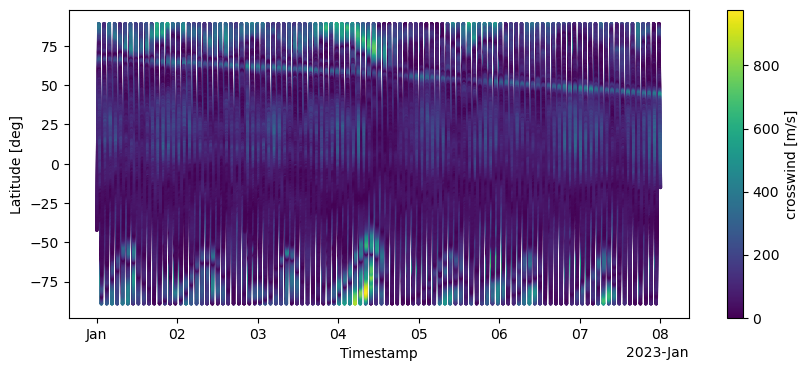

In [7]:
ds.plot.scatter(x="Timestamp", y="Latitude", hue="crosswind", s=2, edgecolors="face", figsize=(10, 4));